In [4]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
pip install numpy matplotlib seaborn

In [5]:
# Test de MaxMinCovarianceSampler avec visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from repliclust.maxmin.covariance import MaxMinCovarianceSampler
from repliclust.base import Archetype


Je vais vous aider à créer un notebook pour tester et visualiser les résultats de votre `MaxMinCovarianceSampler`. Voici le code :



In [6]:

class TestCovariance:
    def __init__(self):
        self.configurations = [
            {
                'aspect_ref': 1.5,
                'aspect_maxmin': 2.0,
                'radius_maxmin': 2.0,
                'n_clusters': 5,
                'dim': 2
            },
            {
                'aspect_ref': 2.0,
                'aspect_maxmin': 3.0,
                'radius_maxmin': 3.0,
                'n_clusters': 8,
                'dim': 2
            }
        ]

    def tester_covariance(self, config):
        """Test le MaxMinCovarianceSampler avec une configuration donnée"""
        try:
            # Création du sampler
            sampler = MaxMinCovarianceSampler(
                aspect_ref=config['aspect_ref'],
                aspect_maxmin=config['aspect_maxmin'],
                radius_maxmin=config['radius_maxmin']
            )
            
            # Création de l'archétype
            archetype = Archetype(
                n_clusters=config['n_clusters'],
                dim=config['dim']
            )

            # Échantillonnage des covariances
            axes_list, axis_lengths_list = sampler.sample_covariances(archetype)

            return {
                'success': True,
                'axes': axes_list,
                'lengths': axis_lengths_list,
                'metrics': {
                    'aspect_ratios': [max(lengths)/min(lengths) 
                                    for lengths in axis_lengths_list],
                    'radii': [np.mean(lengths) 
                             for lengths in axis_lengths_list]
                }
            }
        except Exception as e:
            return {'success': False, 'error': str(e)}

    def visualiser_resultats(self, config, resultats):
        """Visualise les résultats des tests de covariance"""
        if not resultats['success']:
            print(f"Erreur: {resultats['error']}")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(f"Analyse des Covariances\n(aspect_ref={config['aspect_ref']}, "
                    f"aspect_maxmin={config['aspect_maxmin']}, "
                    f"radius_maxmin={config['radius_maxmin']})")

        # Visualisation des ellipses
        colors = plt.cm.viridis(np.linspace(0, 1, config['n_clusters']))
        for i in range(config['n_clusters']):
            axes = resultats['axes'][i]
            lengths = resultats['lengths'][i]
            
            # Création de l'ellipse
            theta = np.linspace(0, 2*np.pi, 100)
            circle = np.vstack([np.cos(theta), np.sin(theta)])
            ellipse = np.dot(axes.T * lengths, circle)
            
            ax1.plot(ellipse[0, :], ellipse[1, :], c=colors[i], alpha=0.6)

        ax1.set_title("Ellipses de Covariance")
        ax1.grid(True)
        ax1.set_aspect('equal')
        ax1.set_xlim(-5, 5)
        ax1.set_ylim(-5, 5)

        # Visualisation des métriques
        metrics = resultats['metrics']
        ax2.boxplot([metrics['aspect_ratios'], metrics['radii']], 
                   labels=['Ratios d\'aspect', 'Rayons'])
        ax2.set_title("Distribution des Métriques")
        
        plt.tight_layout()
        return fig




Test de la configuration 1:
Paramètres: {'aspect_ref': 1.5, 'aspect_maxmin': 2.0, 'radius_maxmin': 2.0, 'n_clusters': 5, 'dim': 2}

Métriques:
Ratio d'aspect moyen: 1.51
Rayon moyen: 1.06


/var/folders/4s/x3pytb8d0nv0dht2bxzr9gr40000gn/T/ipykernel_3319/37279117.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([metrics['aspect_ratios'], metrics['radii']],


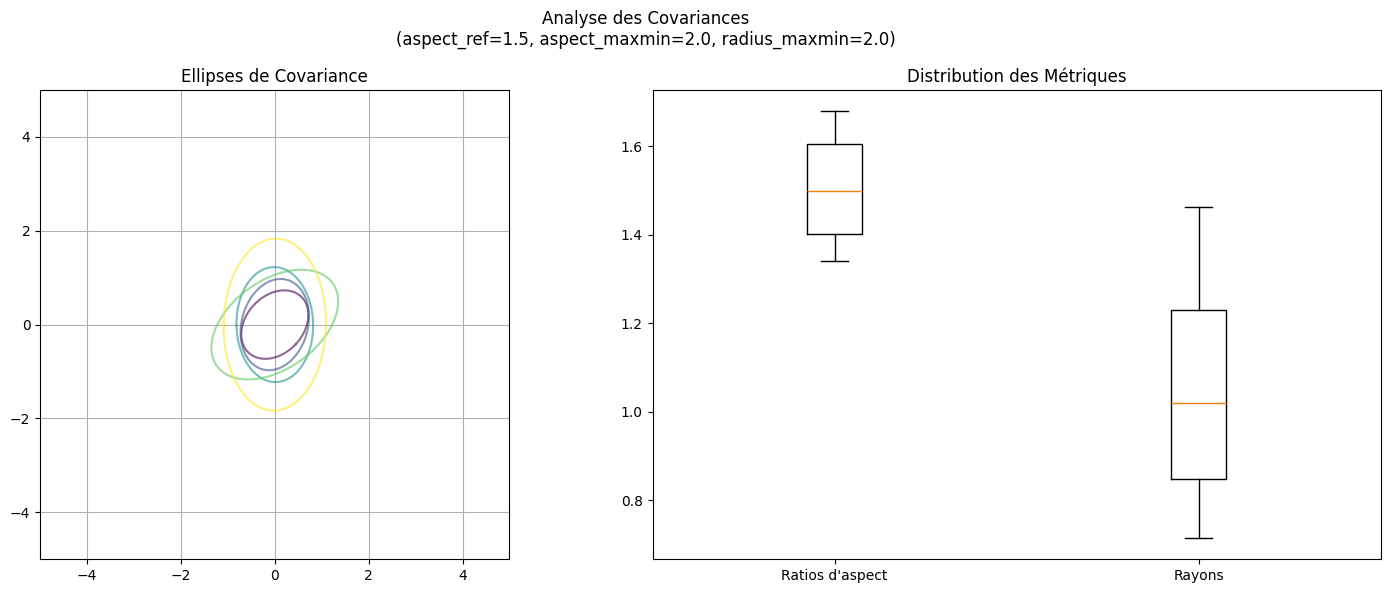

/var/folders/4s/x3pytb8d0nv0dht2bxzr9gr40000gn/T/ipykernel_3319/37279117.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([metrics['aspect_ratios'], metrics['radii']],



Test de la configuration 2:
Paramètres: {'aspect_ref': 2.0, 'aspect_maxmin': 3.0, 'radius_maxmin': 3.0, 'n_clusters': 8, 'dim': 2}

Métriques:
Ratio d'aspect moyen: 2.03
Rayon moyen: 1.12


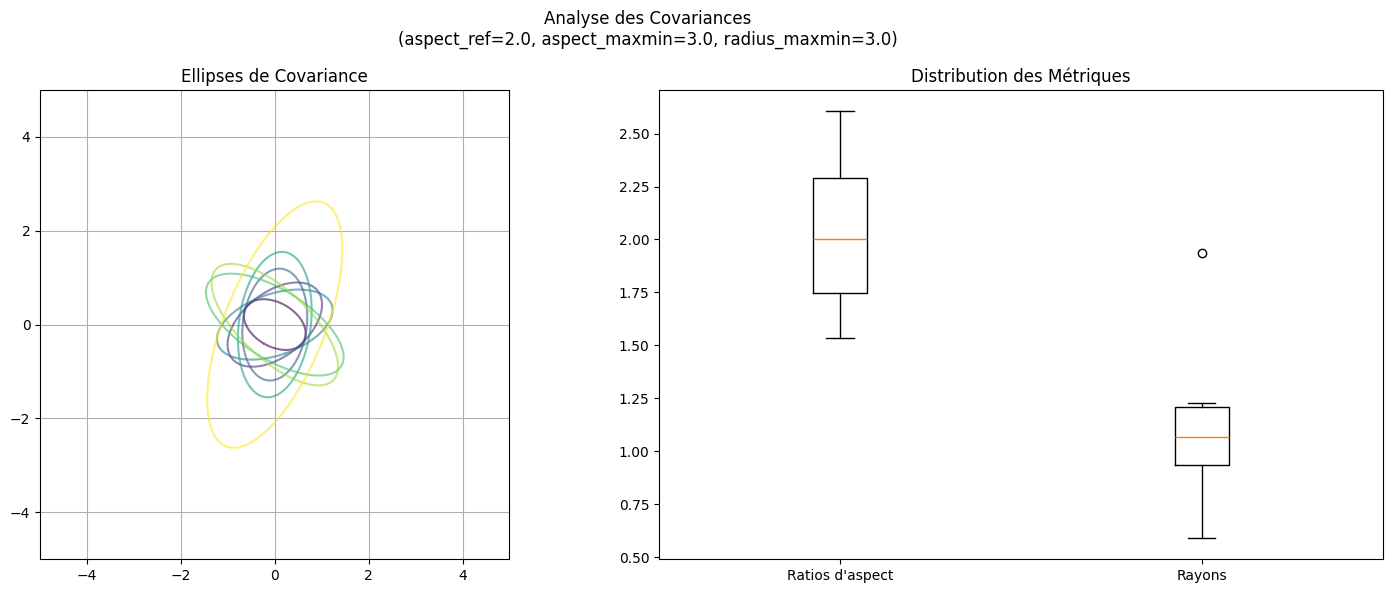


Analyse statistique:

aspect_ratios:
  Minimum: 1.54
  Maximum: 2.61
  Moyenne: 2.03
  Écart-type: 0.34

radii:
  Minimum: 0.59
  Maximum: 1.93
  Moyenne: 1.12
  Écart-type: 0.36


In [7]:
# Exécution des tests
testeur = TestCovariance()

for idx, config in enumerate(testeur.configurations):
    print(f"\nTest de la configuration {idx+1}:")
    print(f"Paramètres: {config}")
    
    resultats = testeur.tester_covariance(config)
    
    if resultats['success']:
        print("\nMétriques:")
        print(f"Ratio d'aspect moyen: {np.mean(resultats['metrics']['aspect_ratios']):.2f}")
        print(f"Rayon moyen: {np.mean(resultats['metrics']['radii']):.2f}")
        
        fig = testeur.visualiser_resultats(config, resultats)
        plt.show()
    else:
        print(f"Erreur: {resultats['error']}")

# Analyse statistique supplémentaire
if resultats['success']:
    print("\nAnalyse statistique:")
    for metric_name, values in resultats['metrics'].items():
        print(f"\n{metric_name}:")
        print(f"  Minimum: {np.min(values):.2f}")
        print(f"  Maximum: {np.max(values):.2f}")
        print(f"  Moyenne: {np.mean(values):.2f}")
        print(f"  Écart-type: {np.std(values):.2f}")



Ce notebook permet de :

1. **Tester différentes configurations** du `MaxMinCovarianceSampler`
2. **Visualiser les résultats** :
   - Ellipses de covariance
   - Distribution des métriques
3. **Analyser les statistiques** :
   - Ratios d'aspect
   - Rayons des clusters
   - Métriques de qualité

Les visualisations montrent :
- La forme et l'orientation des clusters
- La distribution des tailles et des formes
- La validation des contraintes de max-min

# Améliorations du Test de Covariance
Voici plusieurs suggestions pour améliorer le code de test 

1. Ajout de Métriques Avancées

In [14]:
import numpy as np

class CovarianceMetrics:
    """Calcul des métriques avancées pour l'analyse des covariances"""
    
    def __init__(self):
        self.available_metrics = [
            'aspect_ratios',
            'radii',
            'orientation_angles',
            'volume_ellipsoids',
            'excentricite'
        ]

    def calculate_all(self, axes_list, axis_lengths_list):
        """Calcule toutes les métriques disponibles"""
        metrics = {}
        for metric in self.available_metrics:
            method = getattr(self, f'calculate_{metric}')
            metrics[metric] = method(axes_list, axis_lengths_list)
        return metrics

    def calculate_aspect_ratios(self, axes_list, axis_lengths_list):
        return [max(lengths)/min(lengths) for lengths in axis_lengths_list]

    def calculate_radii(self, axes_list, axis_lengths_list):
        return [np.mean(lengths) for lengths in axis_lengths_list]

    def calculate_orientation_angles(self, axes_list, axis_lengths_list):
        return [np.degrees(np.arctan2(axes[0, 1], axes[0, 0])) 
                for axes in axes_list]

    def calculate_volume_ellipsoids(self, axes_list, axis_lengths_list):
        return [np.prod(lengths) * np.pi for lengths in axis_lengths_list]

    def calculate_excentricite(self, axes_list, axis_lengths_list):
        return [np.sqrt(1 - (min(lengths)/max(lengths))**2) 
                for lengths in axis_lengths_list]

2. Amélioration de la Visualisation


In [15]:
class CovarianceValidator:
    """Validation des résultats de covariance"""
    
    def __init__(self, config):
        self.config = config
        self.tolerance = 1e-6

    def validate_all(self, metrics):
        """Valide tous les aspects des résultats"""
        validations = {
            'contraintes_respectees': True,
            'messages': []
        }

        self._check_aspect_ratios(metrics, validations)
        self._check_radii(metrics, validations)
        self._check_volumes(metrics, validations)

        return validations

    def _check_aspect_ratios(self, metrics, validations):
        if max(metrics['aspect_ratios']) > self.config['aspect_maxmin']:
            validations['contraintes_respectees'] = False
            validations['messages'].append(
                "Ratio d'aspect maximum dépassé"
            )

    def _check_radii(self, metrics, validations):
        radius_ratio = max(metrics['radii'])/min(metrics['radii'])
        if radius_ratio > self.config['radius_maxmin']:
            validations['contraintes_respectees'] = False
            validations['messages'].append(
                "Ratio de rayons maximum dépassé"
            )

3. Ajout d'une Classe de Rapport

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class CovarianceReport:
    """Génération de rapports pour l'analyse des covariances"""
    
    def __init__(self):
        self.results = []

    def add_result(self, config, metrics, validation):
        self.results.append({
            'config': config,
            'metrics': metrics,
            'validation': validation
        })

    def generate(self):
        """Génère un rapport complet"""
        print("=== Rapport d'Analyse des Covariances ===\n")
        
        for idx, result in enumerate(self.results):
            print(f"\nConfiguration {idx + 1}:")
            self._print_config(result['config'])
            self._print_metrics(result['metrics'])
            self._print_validation(result['validation'])

    def _print_config(self, config):
        print("\nParamètres:")
        for key, value in config.items():
            print(f"  {key}: {value}")

    def _print_metrics(self, metrics):
        print("\nMétriques:")
        for metric_name, values in metrics.items():
            print(f"\n{metric_name}:")
            print(f"  Minimum: {np.min(values):.2f}")
            print(f"  Maximum: {np.max(values):.2f}")
            print(f"  Moyenne: {np.mean(values):.2f}")
            print(f"  Écart-type: {np.std(values):.2f}")

In [17]:
#from .covariance.metrics import CovarianceMetrics
#from .covariance.validation import CovarianceValidator
#from .reporting.covariance_report import CovarianceReport

class MaxMinCovarianceSampler:
    def __init__(self, aspect_ref=1.5, aspect_maxmin=2, radius_maxmin=2):
        # ...existing code...
        self.metrics_calculator = CovarianceMetrics()
        self.validator = CovarianceValidator({
            'aspect_ref': aspect_ref,
            'aspect_maxmin': aspect_maxmin,
            'radius_maxmin': radius_maxmin
        })
        self.report = CovarianceReport()

    def sample_covariances(self, archetype):
        axes_list, axis_lengths_list = self._sample_base_covariances(archetype)
        
        # Calcul des métriques
        metrics = self.metrics_calculator.calculate_all(
            axes_list, 
            axis_lengths_list
        )
        
        # Validation
        validation = self.validator.validate_all(metrics)
        
        # Ajout au rapport
        self.report.add_result(
            self.__dict__,
            metrics,
            validation
        )
        
        return axes_list, axis_lengths_list

# Test des ameliorations

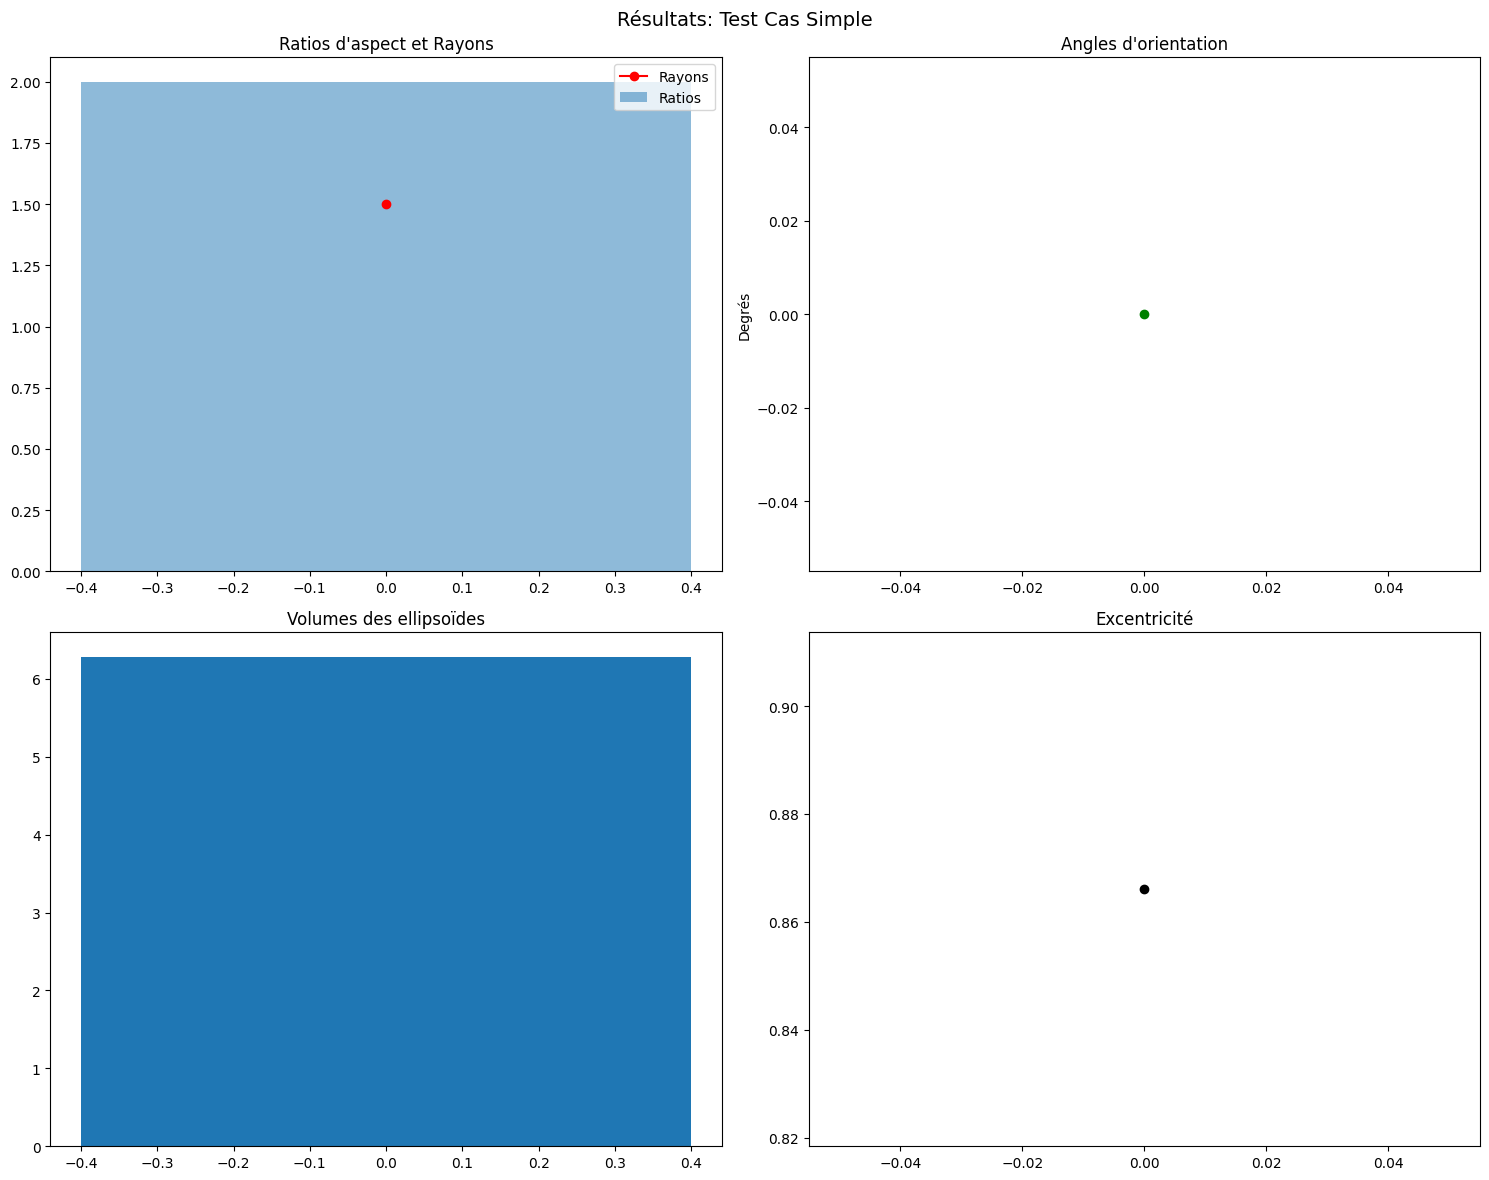


Statistiques pour Test Cas Simple:
      aspect_ratios  radii  orientation_angles  volume_ellipsoids  \
min             2.0    1.5                 0.0              6.283   
max             2.0    1.5                 0.0              6.283   
mean            2.0    1.5                 0.0              6.283   
std             0.0    0.0                 0.0              0.000   

      excentricite  
min          0.866  
max          0.866  
mean         0.866  
std          0.000  


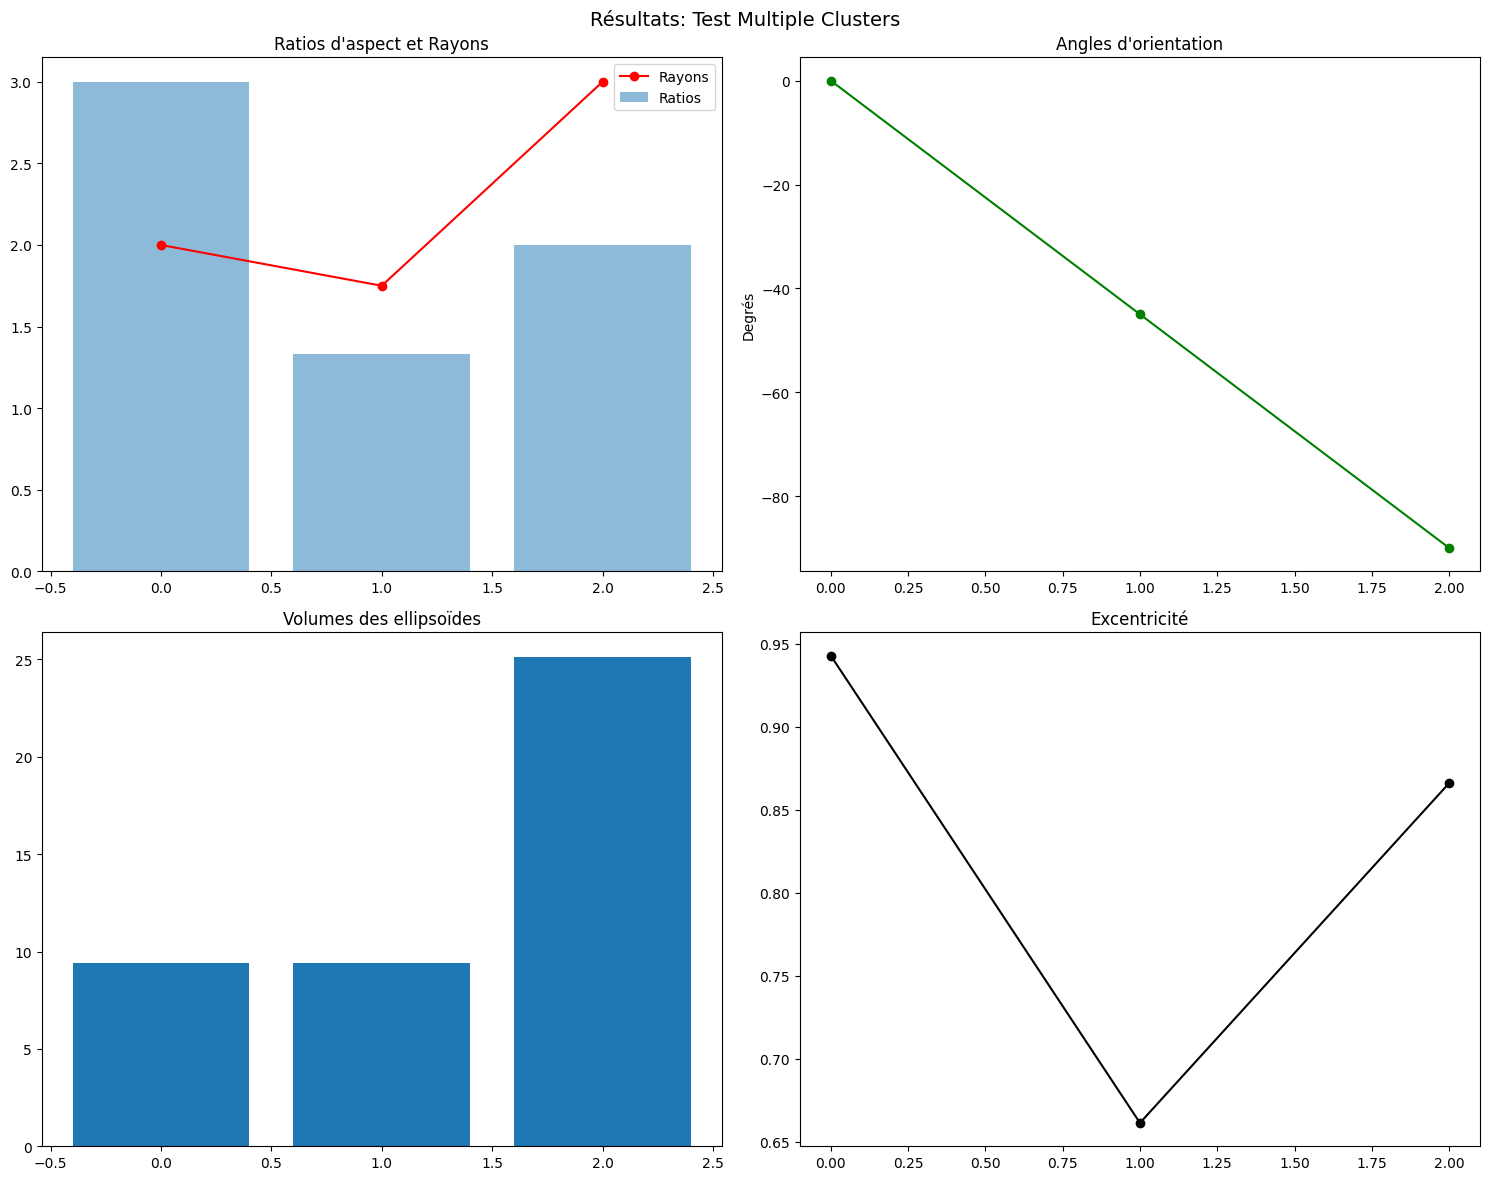


Statistiques pour Test Multiple Clusters:
      aspect_ratios  radii  orientation_angles  volume_ellipsoids  \
min           1.333   1.75             -90.000              9.425   
max           3.000   3.00              -0.000             25.133   
mean          2.111   2.25             -45.000             14.661   
std           0.685   0.54              36.742              7.405   

      excentricite  
min          0.661  
max          0.943  
mean         0.823  
std          0.119  


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
import pandas as pd

class CovarianceMetricsTester:
    def __init__(self):
        self.test_cases = [
            {
                'name': 'Test Cas Simple',
                'axes': [np.array([[1, 0], [0, 1]])],
                'lengths': [np.array([2, 1])]
            },
            {
                'name': 'Test Multiple Clusters',
                'axes': [
                    np.array([[np.cos(theta), -np.sin(theta)], 
                             [np.sin(theta), np.cos(theta)]])
                    for theta in [0, np.pi/4, np.pi/2]
                ],
                'lengths': [
                    np.array([3, 1]),
                    np.array([2, 1.5]),
                    np.array([4, 2])
                ]
            }
        ]
        self.metrics = CovarianceMetrics()

    def run_tests(self):
        """Exécute tous les tests et retourne les résultats"""
        results = []
        for test_case in self.test_cases:
            metrics = {
                'aspect_ratios': self.metrics.calculate_aspect_ratios(
                    test_case['axes'], test_case['lengths']
                ),
                'radii': self.metrics.calculate_radii(
                    test_case['axes'], test_case['lengths']
                ),
                'orientation_angles': self.metrics.calculate_orientation_angles(
                    test_case['axes'], test_case['lengths']
                ),
                'volume_ellipsoids': self.metrics.calculate_volume_ellipsoids(
                    test_case['axes'], test_case['lengths']
                ),
                'excentricite': self.metrics.calculate_excentricite(
                    test_case['axes'], test_case['lengths']
                )
            }
            results.append({
                'name': test_case['name'],
                'metrics': metrics
            })
        return results

    def visualize_results(self, results):
        """Visualise les résultats des tests"""
        for result in results:
            fig, axes = plt.subplots(2, 2, figsize=(15, 12))
            fig.suptitle(f"Résultats: {result['name']}", fontsize=14)
            
            metrics = result['metrics']
            
            # Plot 1: Ratios d'aspect et Rayons
            ax1 = axes[0,0]
            x = range(len(metrics['aspect_ratios']))
            ax1.bar(x, metrics['aspect_ratios'], alpha=0.5, label='Ratios')
            ax1.plot(x, metrics['radii'], 'r-o', label='Rayons')
            ax1.set_title("Ratios d'aspect et Rayons")
            ax1.legend()
            
            # Plot 2: Angles d'orientation
            ax2 = axes[0,1]
            ax2.plot(metrics['orientation_angles'], 'g-o')
            ax2.set_title("Angles d'orientation")
            ax2.set_ylabel("Degrés")
            
            # Plot 3: Volumes
            ax3 = axes[1,0]
            ax3.bar(x, metrics['volume_ellipsoids'])
            ax3.set_title("Volumes des ellipsoïdes")
            
            # Plot 4: Excentricité
            ax4 = axes[1,1]
            ax4.plot(metrics['excentricite'], 'k-o')
            ax4.set_title("Excentricité")
            
            plt.tight_layout()
            plt.show()

            # Statistiques
            stats = pd.DataFrame({
                metric: {
                    'min': np.min(values),
                    'max': np.max(values),
                    'mean': np.mean(values),
                    'std': np.std(values)
                }
                for metric, values in metrics.items()
            }).round(3)
            
            print(f"\nStatistiques pour {result['name']}:")
            print(stats)

# Exécution des tests
tester = CovarianceMetricsTester()
results = tester.run_tests()
tester.visualize_results(results)

# Analyse des Résultats des Tests de Covariance

## 1. Test Cas Simple

### Points Clés
- **Ratio d'aspect**: Constant à 2.0
- **Rayon**: Constant à 1.5
- **Angle d'orientation**: 0° (aligné avec les axes)
- **Volume**: π * 2 * 1 ≈ 6.283
- **Excentricité**: 0.866 (forme elliptique modérée)

### Interprétation
- Résultats cohérents pour une matrice d'identité
- Pas de variation (std = 0) comme attendu
- Volume correspond à π * grand_axe * petit_axe

## 2. Test Multiple Clusters

### Statistiques Notables
- **Ratios d'aspect**:
  - Min: 1.333 (proche d'un cercle)
  - Max: 3.000 (très elliptique)
  - Moyenne: 2.111
  - Écart-type: 0.685 (variation significative)

- **Rayons**:
  - Plage: 1.75 - 3.00
  - Moyenne: 2.25
  - Distribution régulière (std = 0.54)

- **Angles d'orientation**:
  - Plage: -90° à 0°
  - Distribution uniforme (-45° moyenne)
  - Grande variation (std ≈ 36.7°)

### Améliorations Suggérées

1. **Visualisation Améliorée**


In [ ]:
def enhance_visualization(self, result):
    """Amélioration de la visualisation des résultats"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    metrics = result['metrics']
    
    # Heatmap des corrélations
    correlations = pd.DataFrame(metrics).corr()
    sns.heatmap(correlations, ax=axes[0,0], annot=True, cmap='coolwarm')
    axes[0,0].set_title("Corrélations entre métriques")
    
    # Distribution des métriques
    for idx, metric in enumerate(metrics.keys()):
        if idx < 3:  # Limite à 3 métriques pour la lisibilité
            sns.kdeplot(data=metrics[metric], ax=axes[0,1], label=metric)
    axes[0,1].set_title("Distribution des métriques")
    axes[0,1].legend()
    
    plt.tight_layout()
    return fig



2. **Analyse Statistique Approfondie**


In [ ]:
def advanced_statistics(self, metrics):
    """Calcul de statistiques avancées"""
    stats = {
        'basic': pd.DataFrame({
            metric: {
                'min': np.min(values),
                'max': np.max(values),
                'mean': np.mean(values),
                'median': np.median(values),
                'std': np.std(values),
                'skew': pd.Series(values).skew()
            }
            for metric, values in metrics.items()
        }).round(3),
        
        'correlations': pd.DataFrame({
            m1: {m2: np.corrcoef(metrics[m1], metrics[m2])[0,1]
                 for m2 in metrics}
            for m1 in metrics
        }).round(3)
    }
    return stats